#### PIPELINE
- qd on fait du ML 2 partie train/test
- pipeline est un objet où on met les étapes du train (normalizasion, PCA, Split, cross, grid, le modèle choisi,...)
- on peut accéder indépendamment à chacun des objets.
- gain de tps
- on accède à tous les objets dans pipeline.</n>

- il est possible d'utiliser la fonction Transform pour utiliser les meilleurs paramètre sélectionnefr par le Grid.

In [132]:
#Phase 1: Load Dataset

#For reading the CSV file into a Pandas dataframe, we use this function again (which we have already used in previous lessons):

import pandas.io

#
# DECLARATION PART
#
PIPELINEPATH= "ser2_pipeline.pickle"
DATASETPATH= "dataset/adult.data"

def readCsvToDataFrame(path, row_with_column_names):
    theDataFrame= pandas.read_csv(path, header=row_with_column_names)
    return theDataFrame

In [25]:
#And we invoke like this:

adult_data = readCsvToDataFrame(DATASETPATH, None)
adult_data.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']


In [26]:
def show_df_info(dataframe):
    # get the data type
    print(type(dataframe))
    print("amount of entries is %s" % dataframe.size)
    print("dimensions= %i" % dataframe.ndim)
    print("shape is ", end="")
    print(dataframe.shape)
    print("axes: ", end="")
    print(dataframe.axes)
    print("data types of columns:")
    print(dataframe.dtypes)
    print("features: %s" % dataframe.columns)

In [27]:
show_df_info(adult_data)
adult_data.head(5)

<class 'pandas.core.frame.DataFrame'>
amount of entries is 488415
dimensions= 2
shape is (32561, 15)
axes: [RangeIndex(start=0, stop=32561, step=1), Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')]
data types of columns:
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object
features: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


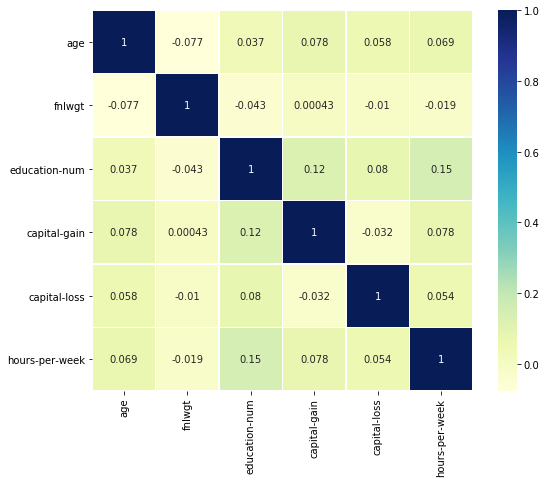

In [28]:
import numpy as np
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

#Data_cleaning
adult_data_num = adult_data.select_dtypes(include=['int64'])
adult_data_num_corr = adult_data_num.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(9, 7))

# Generate a custom diverging colormap #
cmap="YlGnBu"

# Draw the heatmap with the mask and correct aspect ratio (mask=mask)
ax = sns.heatmap(adult_data_num_corr, cmap=cmap, annot=True, annot_kws={"size": 10},square=True, linewidths=.5)

0

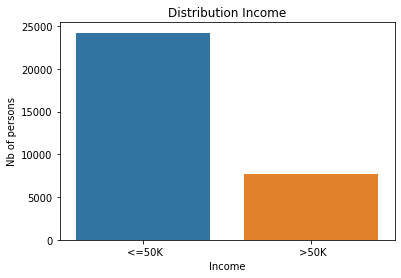

In [29]:
#regroupement des pays par continent dès lors que ce n’est pas les USA qui représentent 89,5% des répondants.
#Pour les lignes NC, je les supprime. Ca fera 583 lignes en moins sur 32561. On travaillera donc avec 31898 lignes.
America=[' Cuba', ' Jamaica', ' Mexico',' Puerto-Rico', ' Honduras',' Canada',' Columbia',' Ecuador',' Haiti', ' Dominican-Republic',' Guatemala', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Trinadad&Tobago', ' Nicaragua',' El-Salvador']
Asia = [' India',' Iran', ' Philippines',' Cambodia', ' Thailand',' Laos',' Taiwan', ' China', ' Japan',' Vietnam', ' Hong']
Europe =[' England', ' Germany',' Italy', ' Poland',' Portugal',' France', ' Yugoslavia',' Scotland', ' Greece', ' Ireland', ' Hungary', ' Holand-Netherlands']
adult_data = adult_data.assign(group_country=adult_data['native-country'].map(lambda x: 'America' if x in America else ('Asia' if x in Asia else ('Europe' if x in Europe else x))))
adult_data.drop(adult_data[adult_data['group_country'] ==' ?'].index, inplace = True )
adult_data.drop(adult_data[adult_data['group_country'] ==' South'].index, inplace = True )
adult_data.drop(columns = 'native-country',inplace = True)

# Je passe cette colonne en ordinal pour plus faciliter les calculs.
adult_data['income_ordinal'] = adult_data['income'].map(lambda x: 1 if x==' >50K' else 0)

sns.countplot(x='income',data=adult_data)

plt.title('Distribution Income')
plt.xlabel('Income')
plt.ylabel('Nb of persons')

adult_data.isna().sum().sum()

In [34]:
#Phase 2: Slice the Dataset

# y pour la Target
y= adult_data["income_ordinal"]

# X pour les Features
X = pd.get_dummies(adult_data.drop(columns=['income_ordinal','income']))

### 1. Split des données en training (80%) et testing (20%) .
Je réalise un split classique de type 80% pour le training et 20% pour le test.

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y ,train_size=0.80, test_size=0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25518, 70), (6380, 70), (25518,), (6380,))

In [59]:
#Phase 3: Create the Pipeline

#This is the code snippet that creates the Scikit-learn pipeline:
from sklearn import tree, pipeline, preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [124]:
#Create Pipeline With Model Selection Search Space
# Create a pipeline
models=[('dec_tree_model', DecisionTreeClassifier()),('logreg',LogisticRegression(solver='liblinear'))]

# Create space of candidate learning algorithms and their hyperparameters
search_params = [{'dec_tree_model__criterion': ['gini','entropy'],
                 'dec_tree_model__max_depth': [5,10,50,None],
                 'dec_tree_model__splitter':['best','random']},
               {'logreg__penalty': ['l1', 'l2'],
                 'logreg__C': np.logspace(-3,3,7)}]

best_para=[]
for model,params in zip(models,search_params):
    pipe = pipeline.Pipeline(steps=[model])   
    searchg = GridSearchCV(pipe, params, iid=False, cv=5)
    searchg.fit(X_train, y_train)
    print("Best parameter (CV score=%0.3f):" % searchg.best_score_,'\n best_params: ',searchg.best_params_)
    best_para.append(searchg.best_params_)
    
for model,params in zip(models,best_para):
    pipe = pipeline.Pipeline(steps=[model])  
    pipe.fit(X_train, y_train)
    print('\n',f' Le modèle {model[0]} performe ' + str(cross_val_score(pipe, X_train, y_train,scoring='accuracy', cv = 10).mean()*100))



Best parameter (CV score=0.855): 
 best_params:  {'dec_tree_model__criterion': 'gini', 'dec_tree_model__max_depth': 10, 'dec_tree_model__splitter': 'best'}
Best parameter (CV score=0.853): 
 best_params:  {'logreg__C': 1000.0, 'logreg__penalty': 'l1'}

  Le modèle dec_tree_model performe 81.6483393936117

  Le modèle logreg performe 79.63007776162523


In [133]:
## PHASE 6: SAVE PIPELINE
from sklearn.externals import joblib

# the whole pipeline in one single file
joblib.dump(pipe, PIPELINEPATH, compress = 1)



['ser2_pipeline.pickle']

In [134]:
## PHASE 7: LOAD THE PIPELINE
# read the file and deserialize the pipeline
pipeline_loaded = joblib.load(PIPELINEPATH)


In [135]:
## PHASE 8: CLASSIFY NEW INSTANCES
# create new random problem instance

result= pipeline_loaded.predict(X_test)
print("class label is %i" % result)

print("--- end of execution ---")

TypeError: %i format: a number is required, not numpy.ndarray